In [3]:
import requests
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
# Function to retrieve repository data from GitHub
def get_repository_data(query):
    url = f'https://api.github.com/search/repositories?q={query}'
    headers = {'Accept': 'application/vnd.github.v3+json'}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        return None
    
    
# Function to retrieve contributors for a repository
def get_contributors(repo_owner, repo_name):
    url = f'https://api.github.com/repos/{repo_owner}/{repo_name}/contributors'
    headers = {'Accept': 'application/vnd.github.v3+json'}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        return []

In [5]:
# Create an empty graph
G = nx.Graph()

# Query for Python repositories sorted by stars
query = 'language:python&sort=stars'

# Retrieve repository data from GitHub
repo_data = get_repository_data(query)

# Extract and add repository nodes to the graph
if repo_data:
    for repo in repo_data['items']:
        repo_owner = repo['owner']['login']
        repo_name = repo['name']
        G.add_node(f"Repository:{repo_owner}/{repo_name}", type='repository', data=repo)

# Create a list of repository nodes for iterating
repository_nodes = [node for node in G.nodes if G.nodes[node]['type'] == 'repository']

In [6]:
# Add edges between users and repositories they've contributed to
for repo in repository_nodes:
    #[1] is used to access the second element of the list, which is "username/repo_name." 
    # split("/") further splits the "username/repo_name" string into two parts using the forward slash ("/"). 
    # After this split, we have two values: repo_owner (the owner's username) and repo_name (the name of the repository).
    repo_owner, repo_name = repo.split(":")[1].split("/")
    contributors_data = get_contributors(repo_owner, repo_name)
    for contributor in contributors_data:
        username = contributor['login']
        G.add_node(f"User:{username}", type='user')
        G.add_edge(f"User:{username}", repo, type='contribution')

In [7]:
# Define what "importance" means in your context
# For example, we'll consider the number of stars as a measure of importance
def measure_importance(repo_data):
    return repo_data['stargazers_count']

# Identify top 3 important repositories based on stars
important_repositories = sorted(repo_data['items'], key=lambda x: measure_importance(x), reverse=True)[:3]

In [8]:
# Basic network analysis
print("Number of nodes:", len(G.nodes))
print("Number of edges:", len(G.edges))

# Display information about the top important repositories
print("Top 3 Important Repositories:")
for repo in important_repositories:
    print(f"\nName: {repo['name']}")
    print(f"\nOwner: {repo['owner']['login']}")
    print(f"\nStars: {repo['stargazers_count']}")
    print(f"\nRepository: {repo['html_url']}")
    print(f"\nDescription: {repo['description']}")

Number of nodes: 872
Number of edges: 867
Top 3 Important Repositories:

Name: public-apis

Owner: public-apis

Stars: 267389

Repository: https://github.com/public-apis/public-apis

Description: A collective list of free APIs

Name: system-design-primer

Owner: donnemartin

Stars: 234177

Repository: https://github.com/donnemartin/system-design-primer

Description: Learn how to design large-scale systems. Prep for the system design interview.  Includes Anki flashcards.

Name: Python

Owner: TheAlgorithms

Stars: 172218

Repository: https://github.com/TheAlgorithms/Python

Description: All Algorithms implemented in Python


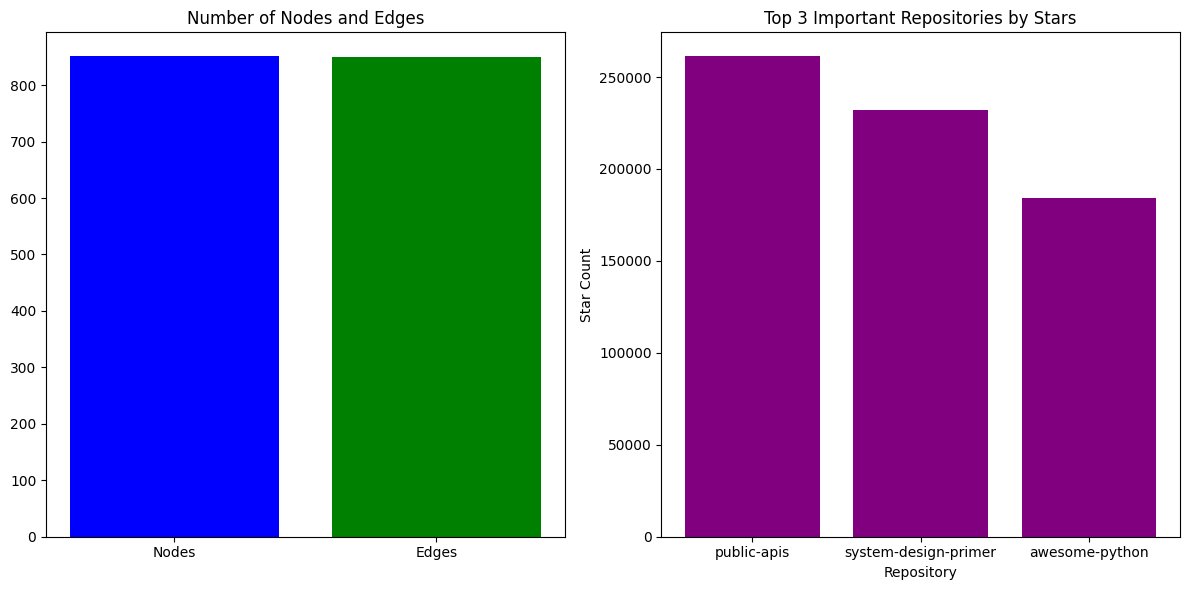

In [7]:
# Number of nodes and edges
num_nodes = len(G.nodes)
num_edges = len(G.edges)

# Extract repository names and their corresponding star counts
repo_names = [repo['name'] for repo in important_repositories]
star_counts = [repo['stargazers_count'] for repo in important_repositories]

# Create subplots
plt.figure(figsize=(12, 6))

# Subplot 1: Number of Nodes and Edges
plt.subplot(1, 2, 1)
plt.bar(['Nodes', 'Edges'], [num_nodes, num_edges], color=['blue', 'green'])
plt.title('Number of Nodes and Edges')

# Subplot 2: Top 3 Important Repositories and their Star Counts
plt.subplot(1, 2, 2)
plt.bar(repo_names, star_counts, color='purple')
plt.xlabel('Repository')
plt.ylabel('Star Count')
plt.title('Top 3 Important Repositories by Stars')

# Display the bar graph
plt.tight_layout()
plt.show()